# Project 3 :

The "Santé publique France" agency has launched a call for projects to find innovative ideas for food-related applications. You want to participate and propose an idea for an application.

I decided to create an application that calculates the sugar level of different products for diabetics.

This second notebook will explore the data.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:
data = pd.read_csv('data_clean.csv')

C:\Users\houda\AppData\Local\Temp\ipykernel_16088\328851463.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data_clean.csv')


## II – Exploratory analysis

In [17]:
data.isna().sum()

code                           0
product_name                   0
pnns_groups_1              27363
countries_tags                 0
countries_fr                   0
carbohydrates_100g             0
sugars_100g                    0
sucrose_100g                   0
glucose_100g                   0
fructose_100g                  0
lactose_100g                   0
maltose_100g                   0
nutrition-score-fr_100g        0
energy_100g                    0
proteins_100g                  0
nutrition_grade_fr             0
dtype: int64

In [18]:
data.head()

,code,product_name,pnns_groups_1,countries_tags,countries_fr,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,nutrition-score-fr_100g,energy_100g,proteins_100g,nutrition_grade_fr
0,3087,Farine de blé noir,NaN,en:france,France,12.25,4.700,0.0,0.0,0.00,0.0,0.0,9.0,1109.0,6.10,d
1,24600,Filet de bœuf,unknown,en:france,France,22.10,3.935,0.3,0.0,57.55,16.4,0.0,9.0,1089.0,5.70,d
2,36252,Lion Peanut x2,unknown,"en:france,en:united-states","France,États-Unis",70.00,57.500,0.3,0.0,57.55,16.4,0.0,22.0,1883.0,2.50,e
3,39259,Twix x2,unknown,en:france,France,22.10,3.935,0.3,0.0,57.55,16.4,0.0,9.0,1089.0,5.70,d
4,39529,Pack de 2 Twix,unknown,"en:france,en:united-states","France,États-Unis",77.08,3.935,0.3,0.0,57.55,16.4,0.0,-4.0,1481.0,6.25,b


In [19]:
data.isnull().sum()

code                           0
product_name                   0
pnns_groups_1              27363
countries_tags                 0
countries_fr                   0
carbohydrates_100g             0
sugars_100g                    0
sucrose_100g                   0
glucose_100g                   0
fructose_100g                  0
lactose_100g                   0
maltose_100g                   0
nutrition-score-fr_100g        0
energy_100g                    0
proteins_100g                  0
nutrition_grade_fr             0
dtype: int64

In [20]:
data.columns

Index(['code', 'product_name', 'pnns_groups_1', 'countries_tags',
       'countries_fr', 'carbohydrates_100g', 'sugars_100g', 'sucrose_100g',
       'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g',
       'nutrition-score-fr_100g', 'energy_100g', 'proteins_100g',
       'nutrition_grade_fr'],
      dtype='object')

### 1 - Univariate analysis

In [21]:
data.describe()

,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,nutrition-score-fr_100g,energy_100g,proteins_100g
count,90155.000000,90155.000000,90155.00000,90155.000000,90155.000000,90155.000000,90155.000000,90155.000000,90155.000000,90155.000000
mean,22.152122,11.352553,10.19819,0.849028,10.402567,2.440175,5.052998,8.396706,1058.632564,7.370178
std,22.599868,16.798499,28.85939,2.057923,19.537640,5.444429,11.450179,7.899222,642.866026,6.994141
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000
25%,9.200000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,517.000000,2.900000
50%,12.250000,4.700000,0.00000,0.000000,0.000000,0.000000,0.000000,9.000000,1109.000000,6.100000
75%,24.000000,11.000000,0.30000,0.100000,2.650000,0.100000,0.000000,13.000000,1501.000000,8.700000
max,100.000000,100.000000,92.80000,8.100000,100.000000,74.500000,39.200000,40.000000,3000.000000,100.000000


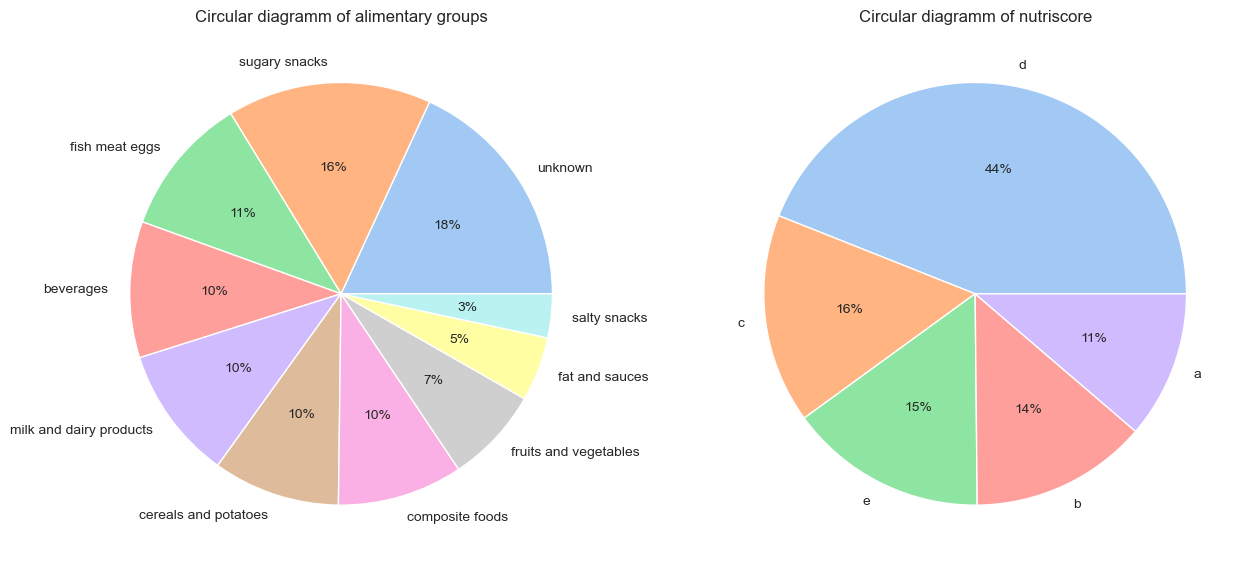

In [22]:
plt.figure(figsize=(15,15))
variable_quali = ['pnns_groups_1', 'nutrition_grade_fr']
plt.subplot(1,2,1)
groupCount = data['pnns_groups_1'].value_counts()
plt.pie(groupCount, labels = groupCount.index, colors=sns.color_palette('pastel'), autopct='%.0f%%')
plt.title("Circular diagramm of alimentary groups")
plt.subplot(1,2,2)
nutriCount = data['nutrition_grade_fr'].value_counts()
plt.pie(nutriCount, labels = nutriCount.index, colors=sns.color_palette('pastel'), autopct='%.0f%%')
plt.title("Circular diagramm of nutriscore")
plt.show()

In [23]:
list1 = ['carbohydrates_100g', 'proteins_100g']
list2 = ['sucrose_100g', 'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g', 'sugars_100g']

C:\Users\houda\anaconda3\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\houda\anaconda3\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\houda\anaconda3\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\houda\anaconda3\Lib\si

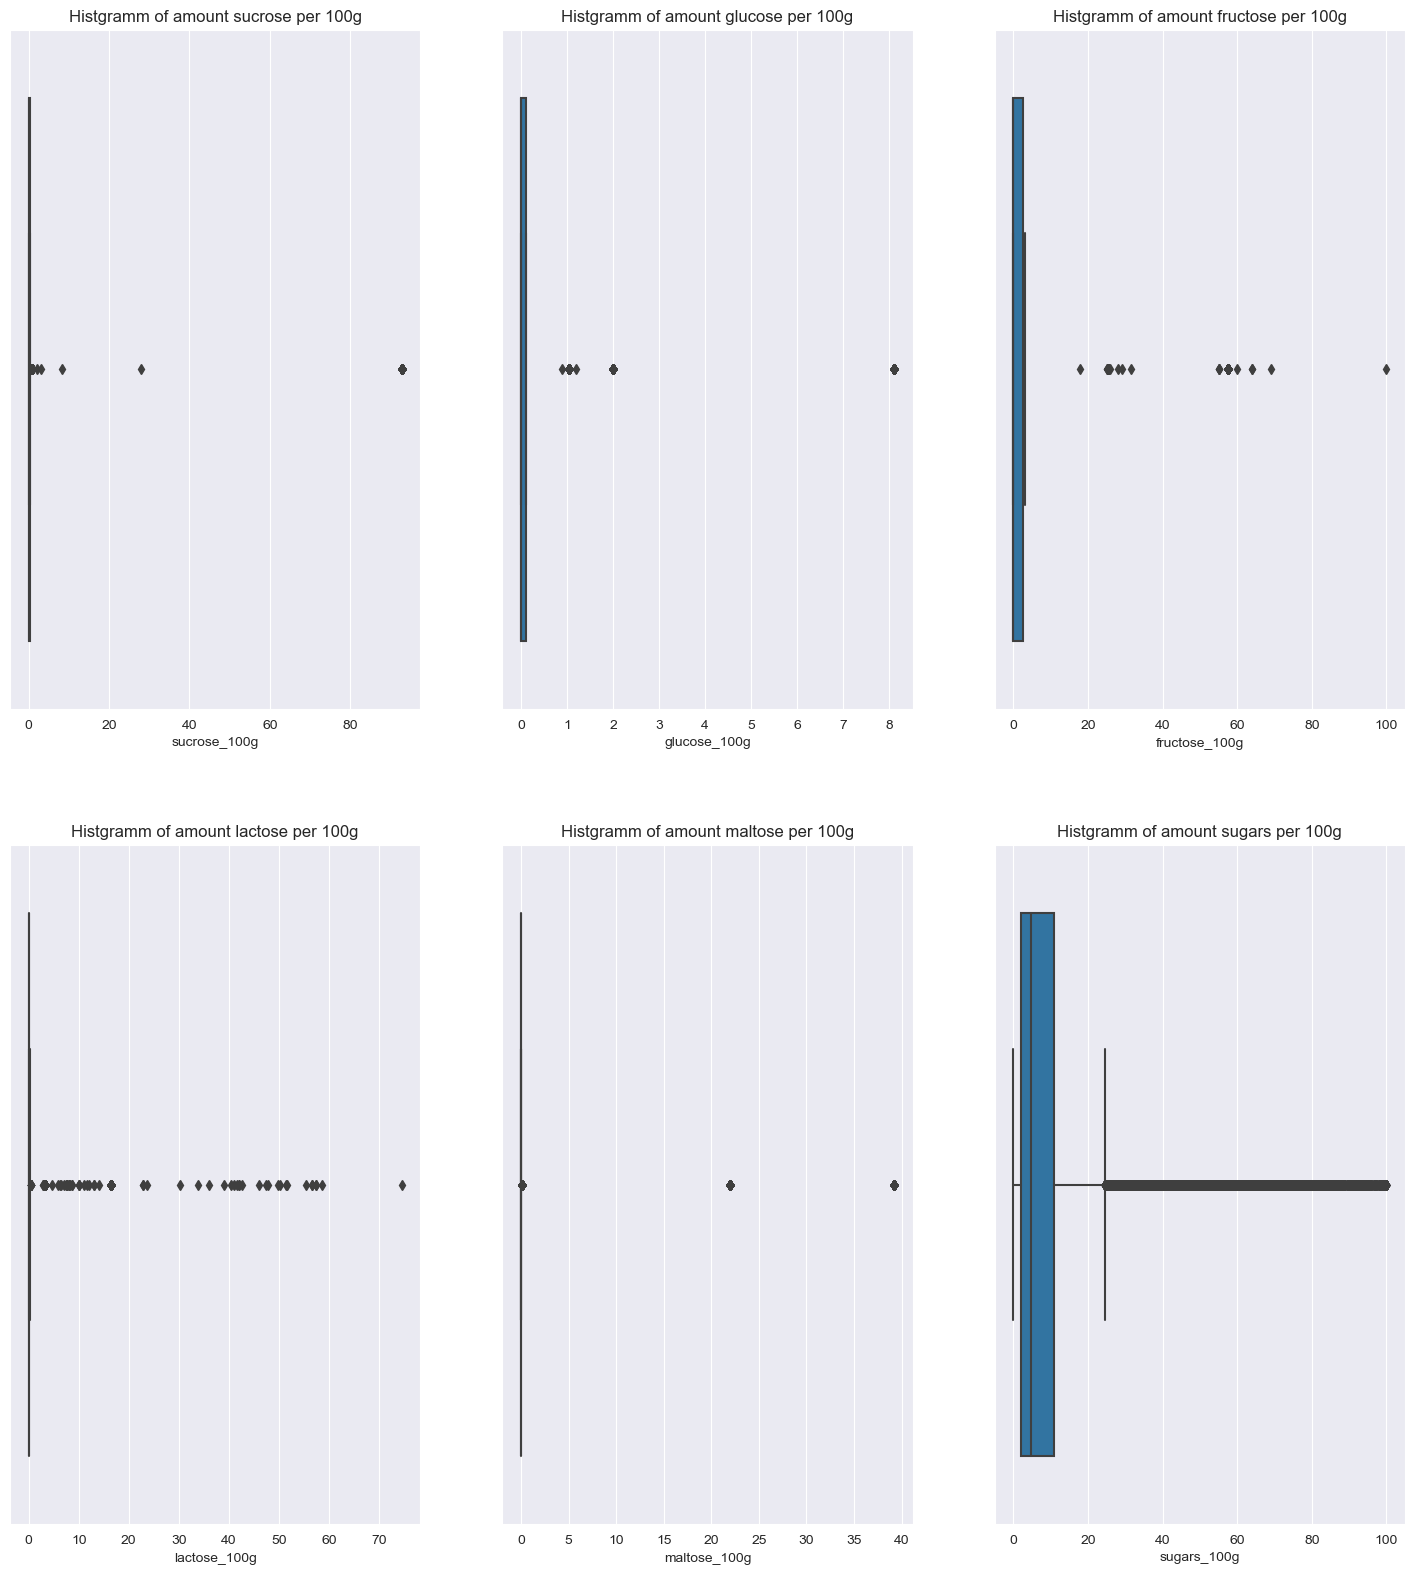

In [24]:
plt.figure(figsize=(18,30))
for i in range(len(list2)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data[list2[i]])
    a = list2[i].split('_')[0]
    plt.title("Histgramm of amount {} per 100g".format(a))
plt.savefig('dist.png')
plt.show()

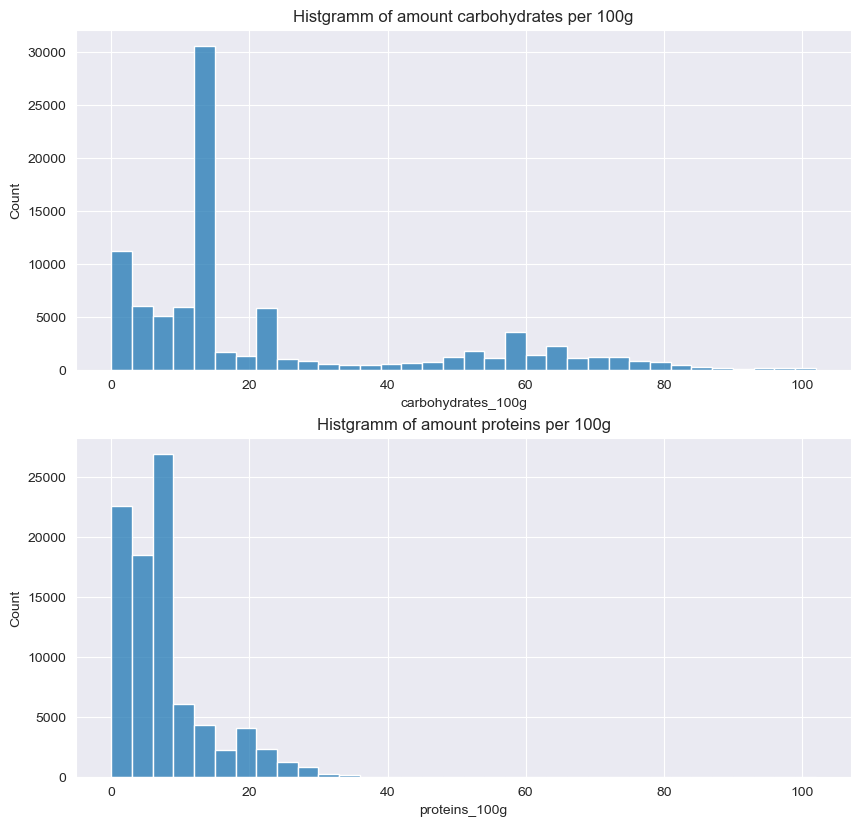

In [25]:
plt.figure(figsize=(10,15))
for i in range(len(list1)):
    plt.subplot(3,1,i+1)
    sns.histplot(data[list1[i]], binwidth=3)
    a = list1[i].split('_')[0]
    plt.title("Histgramm of amount {} per 100g".format(a))
plt.show()

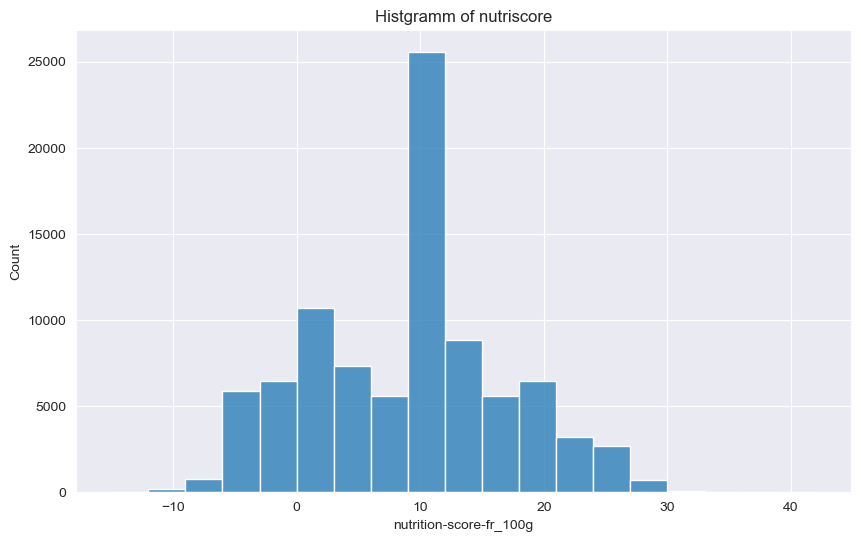

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(data['nutrition-score-fr_100g'], binwidth=3)
plt.title("Histgramm of nutriscore")
plt.show()

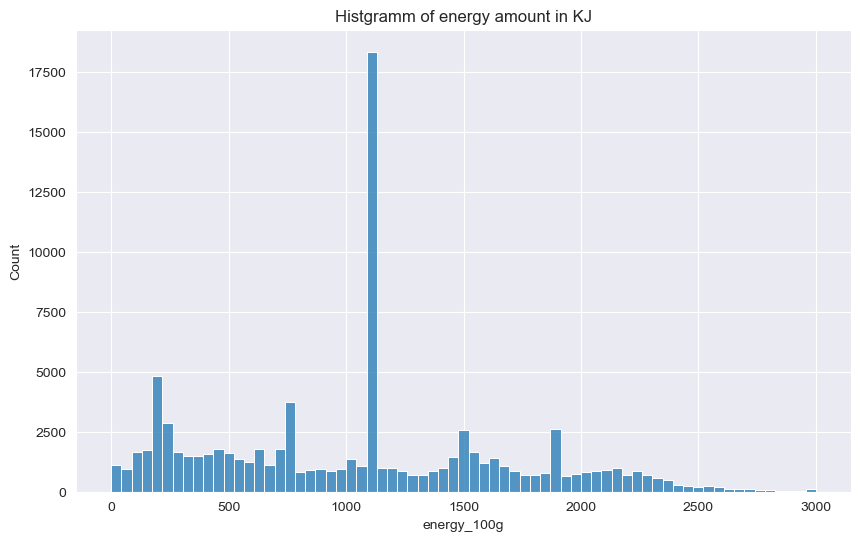

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(data['energy_100g'])
plt.title("Histgramm of energy amount in KJ")
plt.show()

### 2 - Analyse  bi-variée

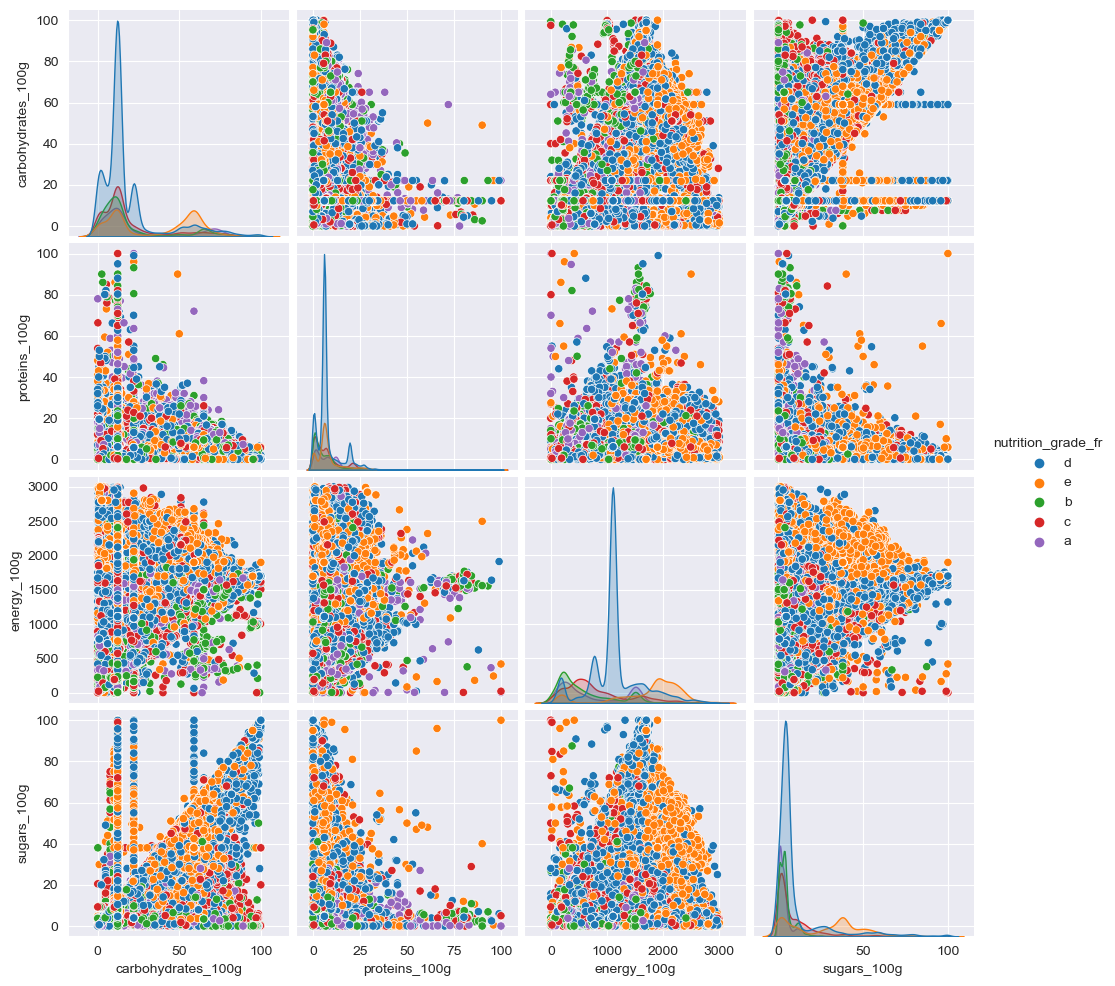

In [28]:
sns.pairplot(data=data[['carbohydrates_100g', 'proteins_100g', 'energy_100g', 'sugars_100g','nutrition_grade_fr']], hue='nutrition_grade_fr')
plt.show()

<AxesSubplot:>

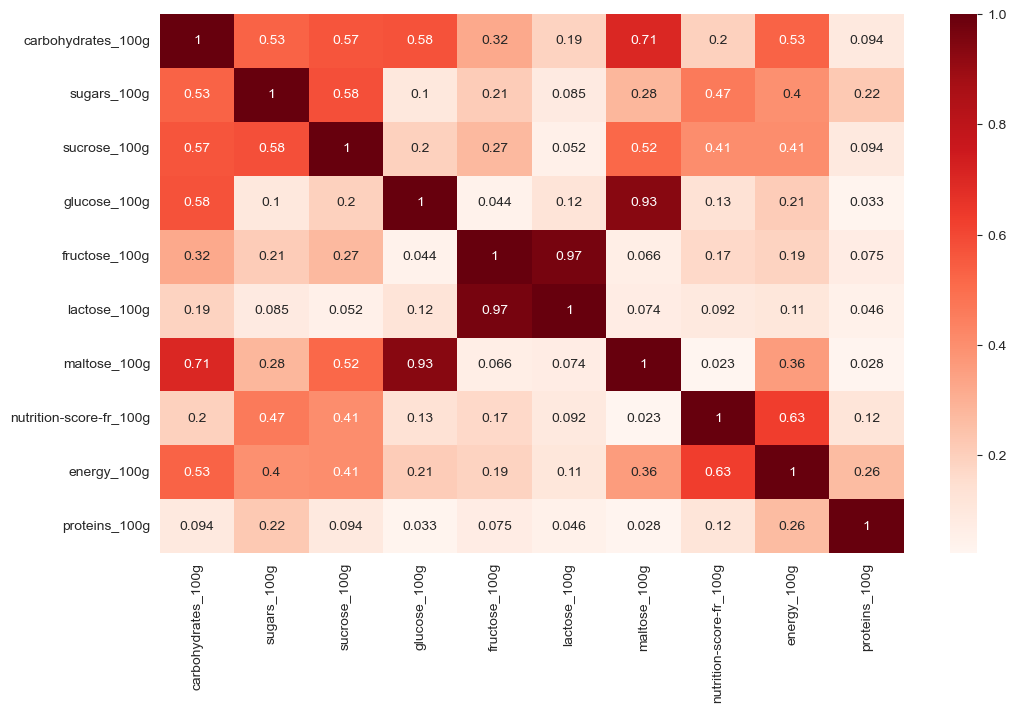

In [29]:
plt.figure(figsize=(12,7))
select = data.filter(like="100g").columns
value = data[select]
corr_matrix = value.corr().abs()
sns.heatmap(corr_matrix, annot=True, cmap="Reds")

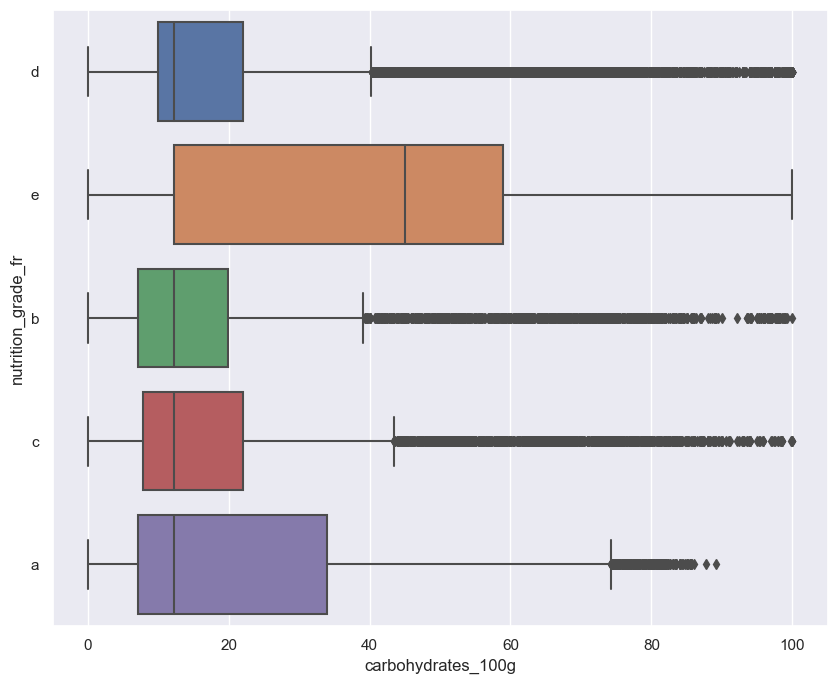

In [30]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.boxplot(data=data, x = 'carbohydrates_100g', y="nutrition_grade_fr")
plt.show()

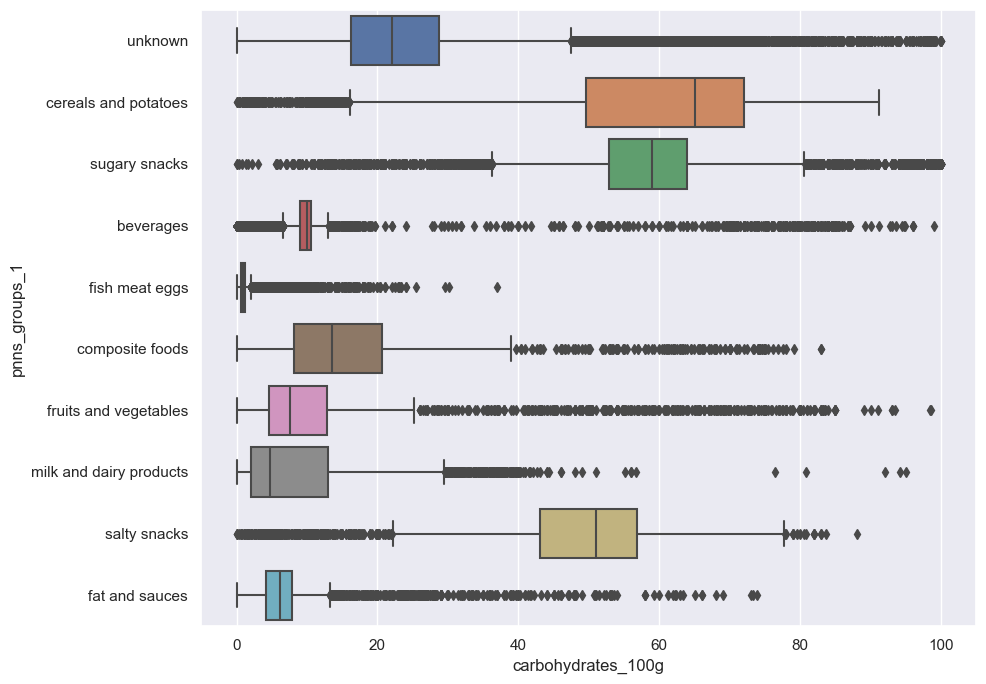

In [31]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.boxplot(data=data, x = 'carbohydrates_100g', y="pnns_groups_1")
plt.show()

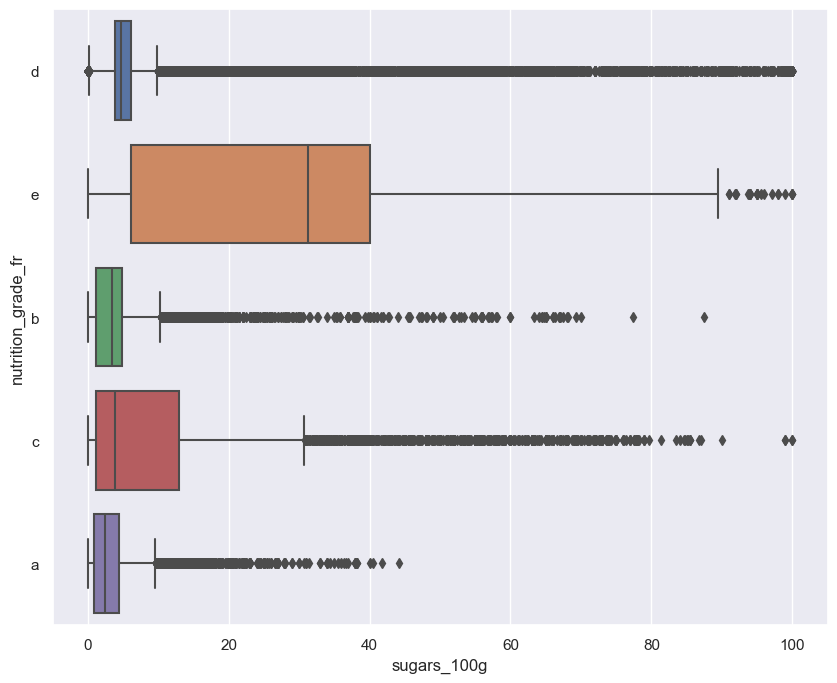

In [32]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.boxplot(data=data, x = 'sugars_100g', y="nutrition_grade_fr")
plt.show()

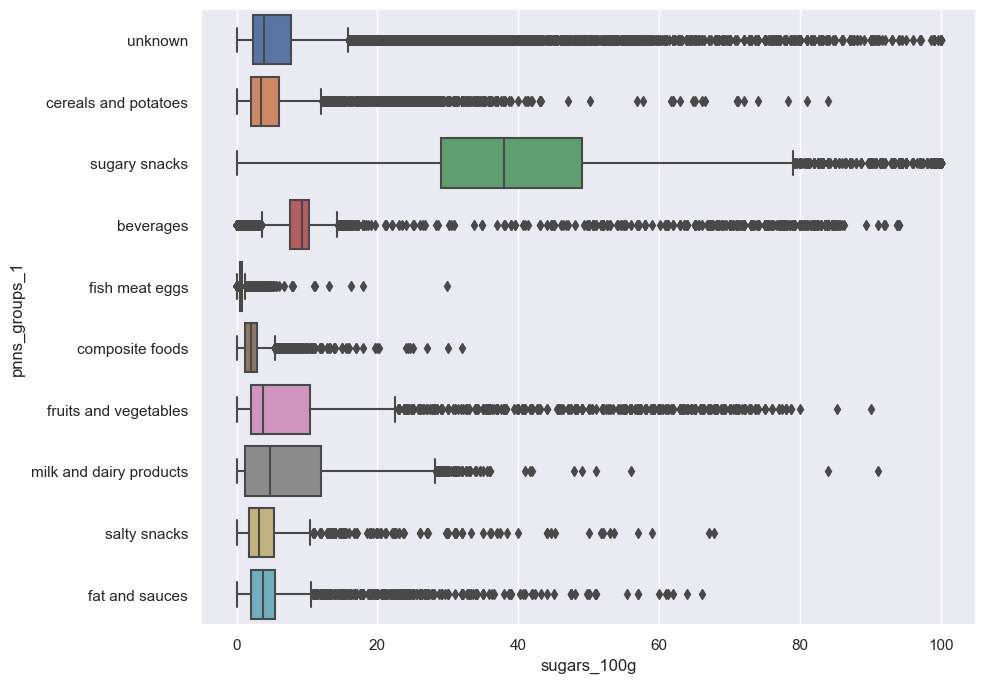

In [33]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.boxplot(data=data, x = 'sugars_100g', y="pnns_groups_1")
plt.show()

### 3 - Analyse multi-variée
#### Analyse multi-variée : ACP

In [34]:
data = data.drop(columns=['sucrose_100g', 'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g'])

In [35]:
select = data.filter(like="100g").columns

In [36]:
select

Index(['carbohydrates_100g', 'sugars_100g', 'nutrition-score-fr_100g',
       'energy_100g', 'proteins_100g'],
      dtype='object')

In [37]:
X = data[select].values

In [38]:
X

array([[1.225e+01, 4.700e+00, 9.000e+00, 1.109e+03, 6.100e+00],
       [2.210e+01, 3.935e+00, 9.000e+00, 1.089e+03, 5.700e+00],
       [7.000e+01, 5.750e+01, 2.200e+01, 1.883e+03, 2.500e+00],
       ...,
       [1.225e+01, 4.700e+00, 9.000e+00, 1.109e+03, 6.100e+00],
       [9.000e-01, 6.000e-01, 1.000e+01, 7.820e+02, 1.950e+01],
       [1.225e+01, 4.700e+00, 9.000e+00, 1.109e+03, 6.100e+00]])

In [39]:
data.index

RangeIndex(start=0, stop=90155, step=1)

In [40]:
features = data[select].columns

In [41]:
scaler = StandardScaler()

In [42]:
scaler.fit(X)

StandardScaler()

In [43]:
X_scaled = scaler.transform(X)

In [44]:
X_scaled

array([[-4.38151960e-01, -3.96022852e-01,  7.63743165e-02,
         7.83486968e-02, -1.81607052e-01],
       [-2.30629337e-03, -4.41562888e-01,  7.63743165e-02,
         4.72378431e-02, -2.38798094e-01],
       [ 2.11718685e+00,  2.74713257e+00,  1.72211516e+00,
         1.28233874e+00, -6.96326428e-01],
       ...,
       [-4.38151960e-01, -3.96022852e-01,  7.63743165e-02,
         7.83486968e-02, -1.81607052e-01],
       [-9.40370064e-01, -6.40093633e-01,  2.02969766e-01,
        -4.30313762e-01,  1.73429285e+00],
       [-4.38151960e-01, -3.96022852e-01,  7.63743165e-02,
         7.83486968e-02, -1.81607052e-01]])

In [45]:
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4
mean,0.0,0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0


In [46]:
n_component = 5

In [47]:
pca = PCA(n_components=n_component)

In [48]:
pca.fit(X_scaled)

PCA(n_components=5)

In [49]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([47.56, 25.2 , 14.85,  8.38,  4.01])

In [50]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 48.,  73.,  88.,  96., 100.])

In [51]:
x_list = range(1, n_component+1
               )

In [52]:
len(x_list)

5

In [53]:
scree_cum

array([ 48.,  73.,  88.,  96., 100.])

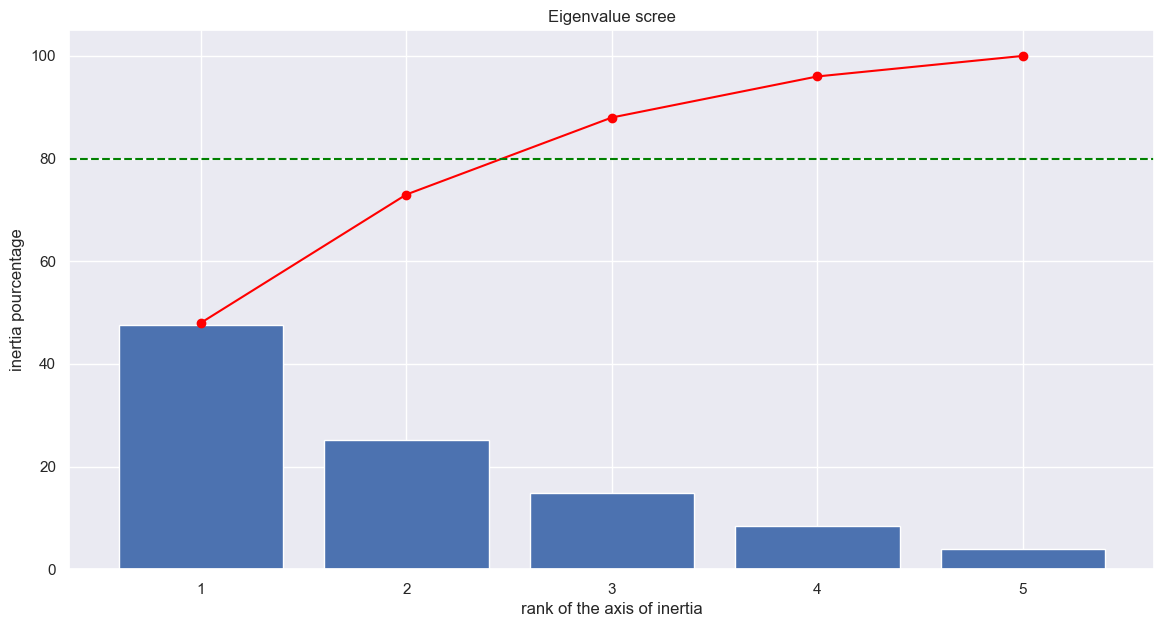

In [77]:
sns.set(rc = {'figure.figsize':(14,7)})
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rank of the axis of inertia")
plt.ylabel("inertia pourcentage")
plt.title("Eigenvalue scree")
plt.axhline(y=80, linestyle= '--', color='green')
plt.show(block=False)

In [55]:
pcs = pca.components_
pcs

array([[ 0.46690985,  0.4951411 ,  0.4852702 ,  0.54794493,  0.03316125],
       [-0.25949589, -0.36409771,  0.23022114,  0.29711997,  0.81167277],
       [ 0.68010638, -0.15351502, -0.6456189 ,  0.11340583,  0.29017892],
       [-0.11081973,  0.71758968, -0.14517295, -0.45535553,  0.49432803],
       [ 0.48972582, -0.28942415,  0.52307945, -0.62551302,  0.10734823]])

In [56]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4
0,0.466910,0.495141,0.485270,0.547945,0.033161
1,-0.259496,-0.364098,0.230221,0.297120,0.811673
2,0.680106,-0.153515,-0.645619,0.113406,0.290179
3,-0.110820,0.717590,-0.145173,-0.455356,0.494328
4,0.489726,-0.289424,0.523079,-0.625513,0.107348


In [57]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,carbohydrates_100g,sugars_100g,nutrition-score-fr_100g,energy_100g,proteins_100g
F1,0.47,0.50,0.49,0.55,0.03
F2,-0.26,-0.36,0.23,0.30,0.81
F3,0.68,-0.15,-0.65,0.11,0.29
F4,-0.11,0.72,-0.15,-0.46,0.49
F5,0.49,-0.29,0.52,-0.63,0.11


In [58]:
x, y = 1,2

In [78]:
def correlation_graph(pca,
                      x_y,
                      features) :
    """Displays the correlation graph.

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : our PCA object which was fit.
    x_y : list ou tuple : the pair x,y of the planes to display, example [0,1] for F1, F2.
    features : list ou tuple : the list of features (ie dimensions) to represent.
    """

    # Extract x et y
    x,y=x_y

    # Image size (in inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # For each component :
    for i in range(0, pca.components_.shape[1]):

        # The arrows
        ax.arrow(0,0,
                 pca.components_[x, i],
                 pca.components_[y, i],
                 head_width=0.07,
                 head_length=0.07,
                 width=0.02, )

        # Labels
        plt.text(pca.components_[x, i] + 0.05,
                 pca.components_[y, i] + 0.05,
                 features[i])

    # Display of horizontal and vertical lines
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Name of the axes, with the percentage of inertia explained
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))


    plt.title("Circle of correlations (F{} et F{})".format(x+1, y+1))

    # The circle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

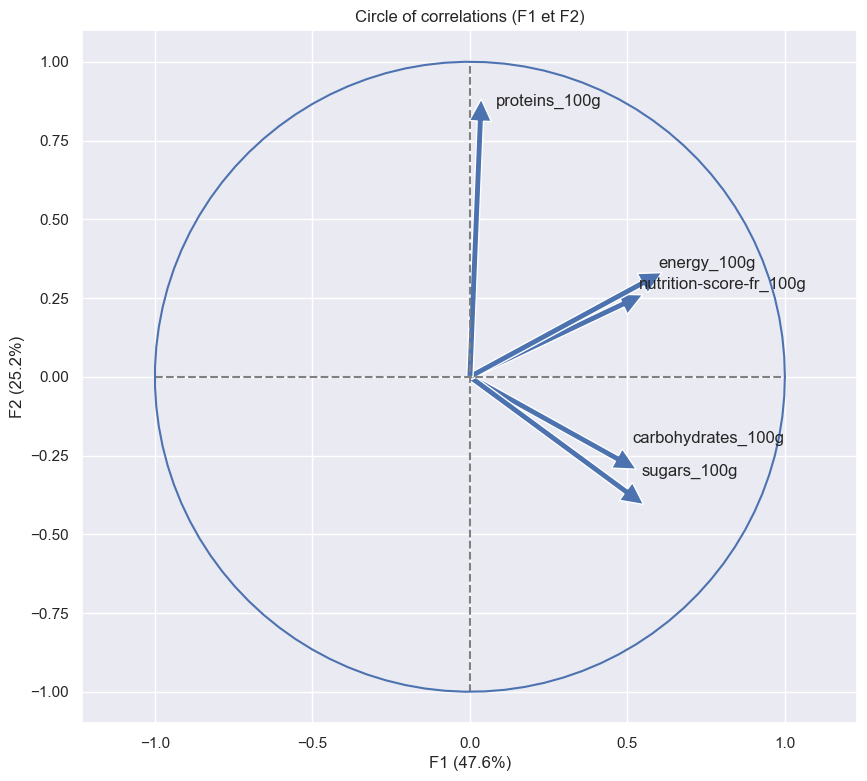

In [79]:
correlation_graph(pca,(0,1),features)

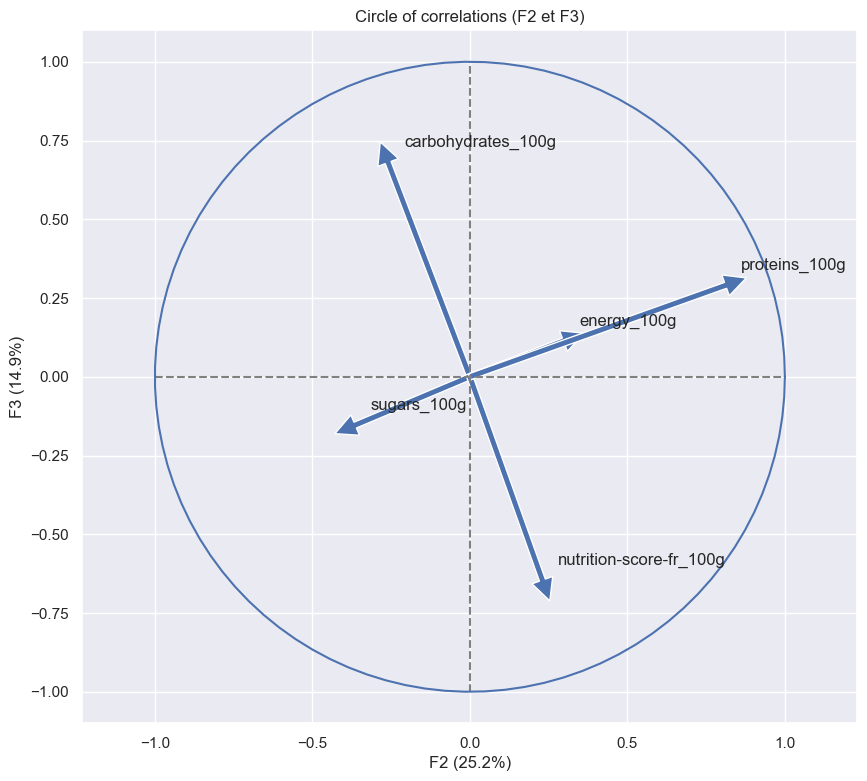

In [80]:
correlation_graph(pca,(1,2),features)

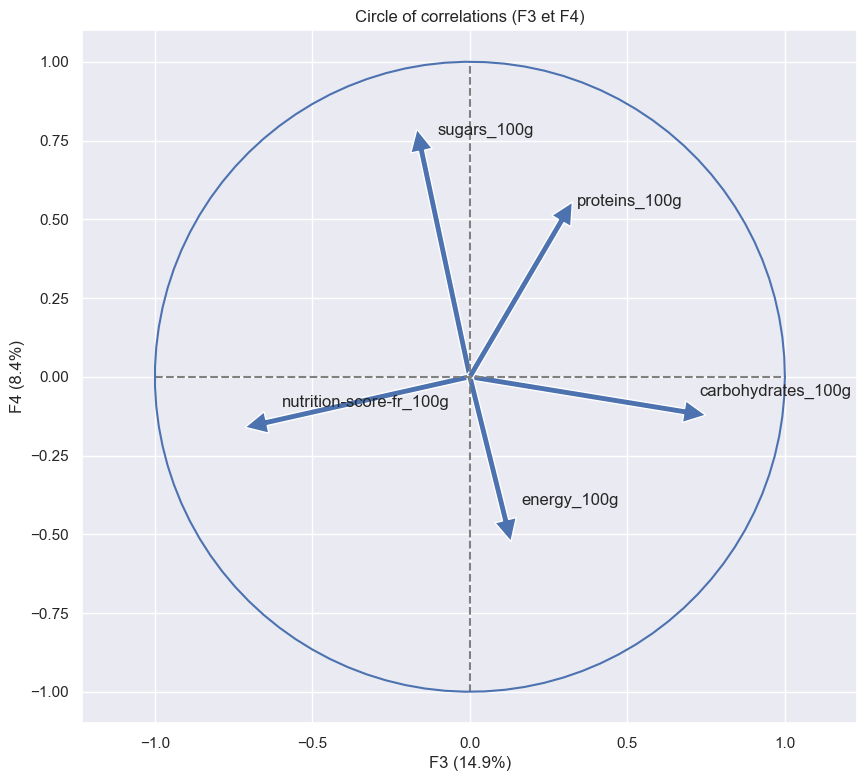

In [81]:
correlation_graph(pca,(2,3),features)

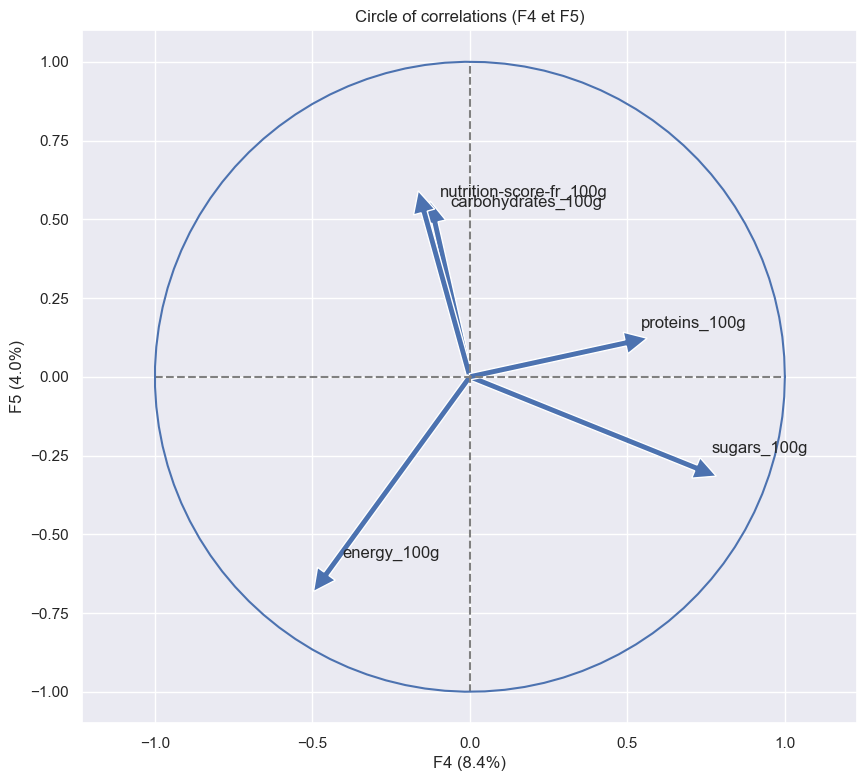

In [82]:
correlation_graph(pca,(3,4),features)

In [83]:
X_proj = pca.transform(X_scaled)

In [84]:
X_proj

array([[-3.26694024e-01,  1.51346095e-01, -3.30316527e-01,
        -3.72163482e-01, -1.28509240e-01],
       [-1.64685695e-01, -8.37109835e-04, -4.70278159e-02,
        -4.67247476e-01,  1.11436909e-01],
       [ 3.86400476e+00, -1.33733940e+00, -1.50278509e-01,
         5.58549664e-01,  2.65688637e-01],
       ...,
       [-3.26694024e-01,  1.51346095e-01, -3.30316527e-01,
        -3.72163482e-01, -1.28509240e-01],
       [-8.35786451e-01,  1.80363019e+00, -2.17873666e-01,
         6.68676569e-01,  2.86244487e-01],
       [-3.26694024e-01,  1.51346095e-01, -3.30316527e-01,
        -3.72163482e-01, -1.28509240e-01]])

In [85]:
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="." ):
    # Transform X_projected in np.array
    X_ = np.array(X_projected)

    # We define the shape of the figure if it has not been given
    if not figsize:
        figsize = (7,6)

    # We manage the labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # We check the variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axis are required")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("the axis variable is not good")

        # we define x and y
    x, y = x_y

    # Figure initialization
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # We check if there are clusters or not
    c = None if clusters is None else clusters

    # The points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # If the pca variable has been provided, we can calculate the % variance of each axis
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Name of the axes, with the percentage of inertia explained
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Value x max and y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # We bound x and y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Display of horizontal and vertical lines
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Display of point labels
    if len(labels) :
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

            # Title and display
    plt.title(f"Projection of individuals (sur F{x+1} et F{y+1})")
    plt.show()

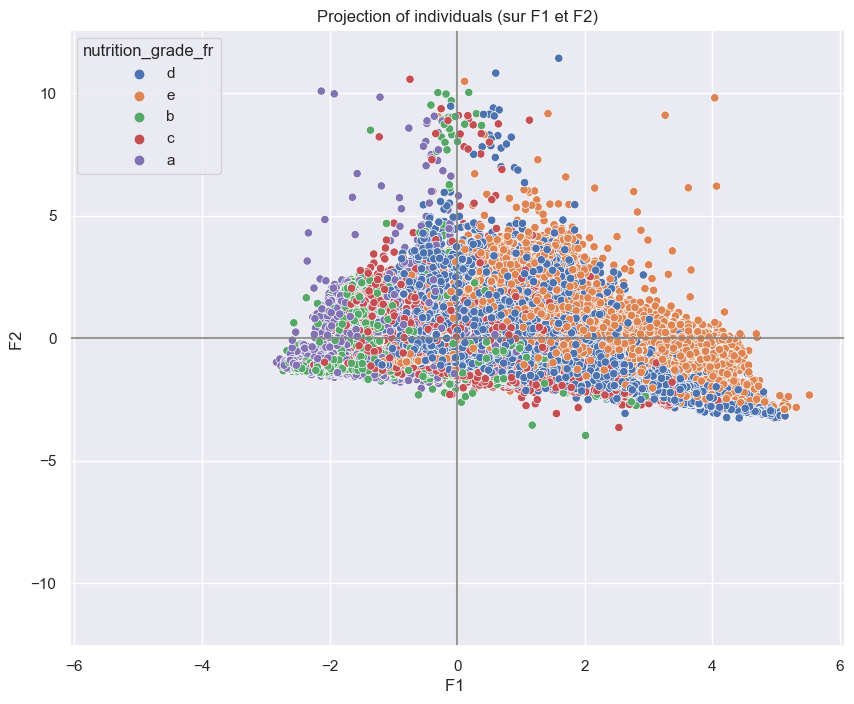

In [86]:
display_factorial_planes(X_proj, (0,1), clusters=data['nutrition_grade_fr'])

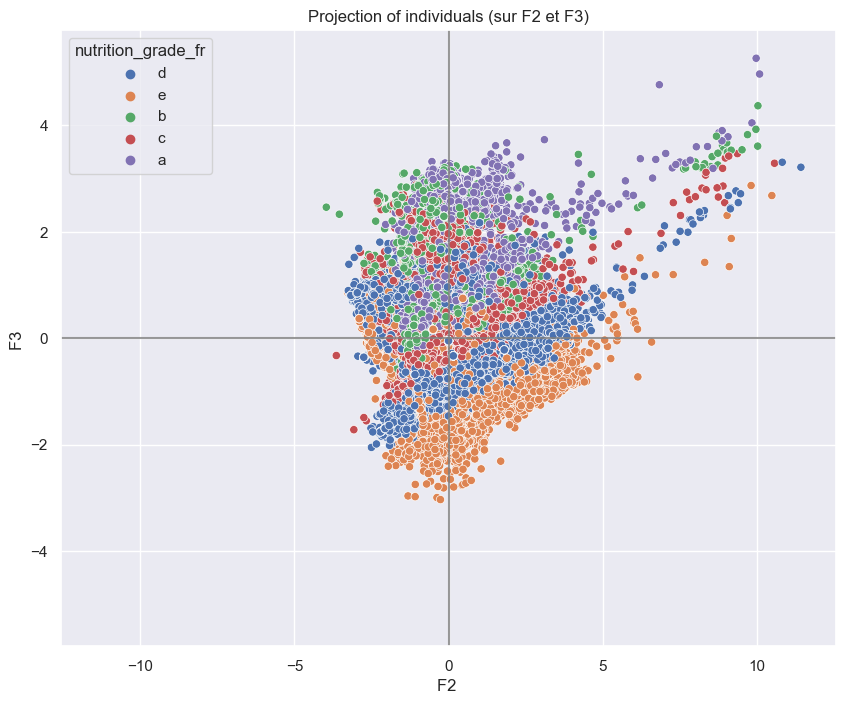

In [87]:
display_factorial_planes(X_proj, (1,2), clusters=data['nutrition_grade_fr'])

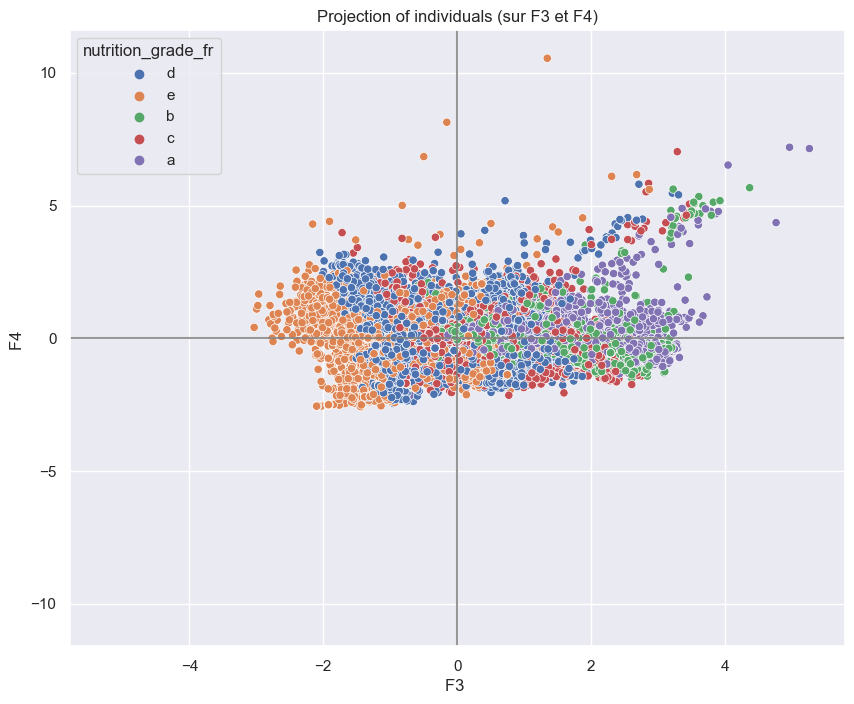

In [88]:
display_factorial_planes(X_proj, (2,3), clusters=data['nutrition_grade_fr'])

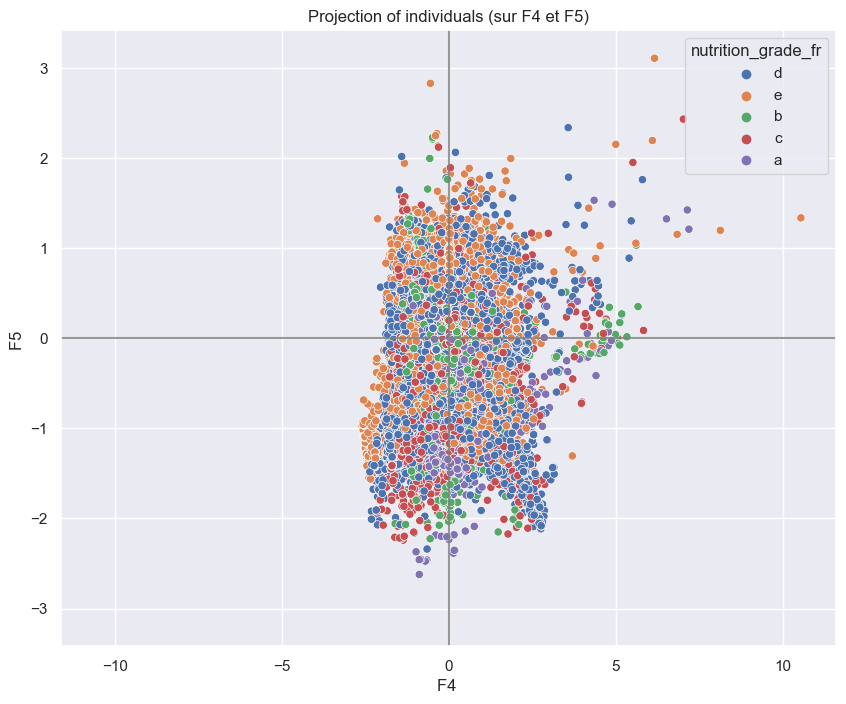

In [89]:
display_factorial_planes(X_proj, (3,4), clusters=data['nutrition_grade_fr'])

In [90]:
#display_factorial_planes(X_proj, (4,5), clusters=data['nutrition_grade_fr'])

In [91]:
k = len(pd.unique(data.nutrition_grade_fr))  # number of conditions
N = len(data.values)  # conditions times participants
n = data.groupby('nutrition_grade_fr').size()[0]

In [92]:
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

#### Analyse multi-variée : ANOVA

In [93]:
sucre = ['carbohydrates_100g', 'sugars_100g']
valeurs_qlt = ['pnns_groups_1', "nutrition_grade_fr"]

In [94]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [95]:
for e1 in sucre:
    print(e1)
    for e2 in valeurs_qlt :
        mod = ols('{0} ~ {1}'.format(e1, e2),
          data=data).fit()

        aov_table = sm.stats.anova_lm(mod, typ=2)
        esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
        print(aov_table , '\n' , esq_sm)

carbohydrates_100g
                     sum_sq       df             F  PR(>F)
pnns_groups_1  2.735619e+07      9.0  13067.492034     0.0
Residual       1.460347e+07  62782.0           NaN     NaN 
 0.6519640835405063
                          sum_sq       df            F  PR(>F)
nutrition_grade_fr  3.235349e+06      4.0  1703.216211     0.0
Residual            4.281117e+07  90150.0          NaN     NaN 
 0.07026261916385873
sugars_100g
                     sum_sq       df            F  PR(>F)
pnns_groups_1  9.340478e+06      9.0  6874.456994     0.0
Residual       9.478145e+06  62782.0          NaN     NaN 
 0.49634227196452646
                          sum_sq       df            F  PR(>F)
nutrition_grade_fr  4.814016e+06      4.0  5260.023494     0.0
Residual            2.062650e+07  90150.0          NaN     NaN 
 0.18922633504730918
